In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

import sys
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [158]:
ts = pd.read_excel("loadsts.xlsx")
dates = ts['Posted_date']
ts = ts['Loads'].values

In [159]:
def split(serie, trainportion):
    perct = math.ceil(len(ts) * trainportion)
    perc2 = math.ceil(len(ts)*((1 - trainportion)/2))
    train = serie[0:perct]
    validation = serie[perct:perct+perc2]
    test = serie[perct+perc2:]
    return train, validation, test

In [165]:
values = (ts - np.min(ts)) / (np.max(ts) - np.min(ts))

In [161]:
def create_dataset(series, look_back):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:(i + look_back)])
        y.append(series[i + look_back])
    return np.array(X), np.array(y)

In [166]:
X, y = create_dataset(values, 3)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [71]:
train_size = int(len(X) * 0.7)
val_size = int((len(X) - train_size)/2)
X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

In [167]:
train_size = int(len(X) * 0.7)
#val_size = int((len(X) - train_size)/2)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

## RNN

In [178]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Definir el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
model.add(Dropout(0.2))
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, validation_split=0.2, callbacks=[early_stopping])
#history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, validation_split=0.2)

# Hacer predicciones
#predictions = model.predict(X_val)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2237 - val_loss: 0.2522
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2329 - val_loss: 0.2507
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1897 - val_loss: 0.2531
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2501 - val_loss: 0.2531
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1944 - val_loss: 0.2672
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2415 - val_loss: 0.2367
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2321 - val_loss: 0.2839
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2388 - val_loss: 0.2833
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2601 - val_loss: 0.2537
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2437 - val_loss: 0.1927
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1722 - val_loss: 0.1792
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━

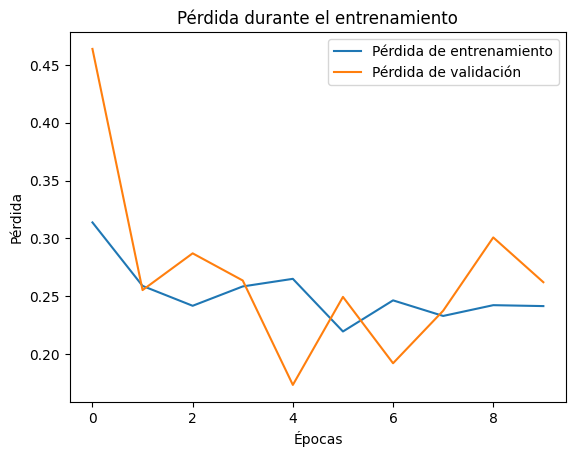

In [174]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [179]:
# Desnormalizar las predicciones
predictions = predictions * (np.max(ts) - np.min(ts)) + np.min(ts)
predictions = predictions.flatten()

# Desnormalizar el test de validacion
val = y_val * (np.max(ts) - np.min(ts)) + np.min(ts)

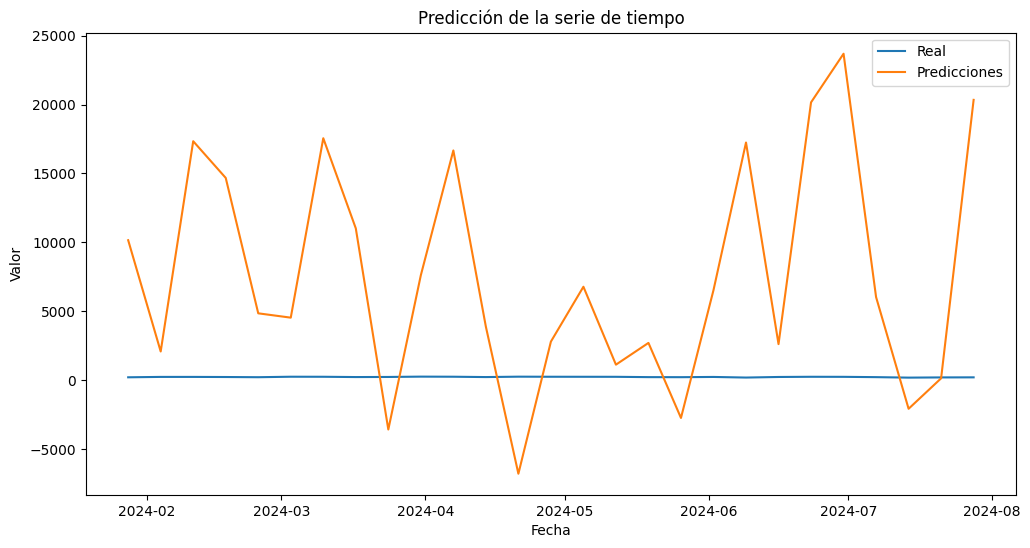

In [180]:
# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(dates[-len(y_val):], val, label='Real')
plt.plot(dates[-len(predictions):], predictions, label='Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Predicción de la serie de tiempo')
plt.legend()
plt.show()

In [177]:
np.sum(np.abs((val - predictions) / val)) / len(val)

0.8604990171413853

## perceptrones multicapa

In [187]:
scaler = MinMaxScaler(feature_range=(0, 1))
values2 = scaler.fit_transform(ts.reshape(-1, 1))

In [ ]:
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)